In [1]:
import pandas as pd
import numpy as np
import sidetable
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/analysis1.csv')

In [3]:
df.head(5)
#S&P500
#most tweets x month on both and then open closed to check price change for that dat. 
#jan-sept 2016 tweets influence on election and market
#scrapping print something

,retweets_clinton,favorites_clinton,tw_count_cl,retweets_trump,favorites_trump,tw_count_tr,adjpoll_clinton,adjpoll_trump,index_weighted,date,Open,High,Low,Close,Adj Close,Volume,market_op_cl
0,10343.0,18407.0,9.0,37798.0,111713.0,7.0,49.390183,36.714560,7.108429e-09,2016-04-17,NaN,NaN,NaN,NaN,NaN,NaN,market_closed
1,15774.0,32522.0,16.0,30166.0,81057.0,7.0,41.707332,41.849163,0.000000e+00,2016-04-18,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,market_open
2,19237.0,41969.0,17.0,71062.0,196358.0,19.0,42.949914,43.854084,1.196509e-06,2016-04-19,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,market_open
3,38537.0,95533.0,26.0,30635.0,91925.0,7.0,45.141442,40.746182,8.987424e-07,2016-04-20,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,market_open
4,11666.0,26331.0,10.0,24147.0,71647.0,4.0,41.589907,45.997803,3.079168e-08,2016-04-21,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,market_open


In [4]:
df.duplicated(['date']).sum()

0

In [5]:
df.dtypes

retweets_clinton     float64
favorites_clinton    float64
tw_count_cl          float64
retweets_trump       float64
favorites_trump      float64
tw_count_tr          float64
adjpoll_clinton      float64
adjpoll_trump        float64
index_weighted       float64
date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume               float64
market_op_cl          object
dtype: object

In [6]:
df.columns

Index(['retweets_clinton', 'favorites_clinton', 'tw_count_cl',
       'retweets_trump', 'favorites_trump', 'tw_count_tr', 'adjpoll_clinton',
       'adjpoll_trump', 'index_weighted', 'date', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'market_op_cl'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head(5)

,retweets_clinton,favorites_clinton,tw_count_cl,retweets_trump,favorites_trump,tw_count_tr,adjpoll_clinton,adjpoll_trump,index_weighted,date,open,high,low,close,adj close,volume,market_op_cl
0,10343.0,18407.0,9.0,37798.0,111713.0,7.0,49.390183,36.714560,7.108429e-09,2016-04-17,NaN,NaN,NaN,NaN,NaN,NaN,market_closed
1,15774.0,32522.0,16.0,30166.0,81057.0,7.0,41.707332,41.849163,0.000000e+00,2016-04-18,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,market_open
2,19237.0,41969.0,17.0,71062.0,196358.0,19.0,42.949914,43.854084,1.196509e-06,2016-04-19,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,market_open
3,38537.0,95533.0,26.0,30635.0,91925.0,7.0,45.141442,40.746182,8.987424e-07,2016-04-20,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,market_open
4,11666.0,26331.0,10.0,24147.0,71647.0,4.0,41.589907,45.997803,3.079168e-08,2016-04-21,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,market_open


In [9]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [10]:
df.dtypes

retweets_clinton            float64
favorites_clinton           float64
tw_count_cl                 float64
retweets_trump              float64
favorites_trump             float64
tw_count_tr                 float64
adjpoll_clinton             float64
adjpoll_trump               float64
index_weighted              float64
date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
adj close                   float64
volume                      float64
market_op_cl                 object
dtype: object

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [12]:
cols = df.columns.tolist()

In [13]:
cols

['retweets_clinton',
 'favorites_clinton',
 'tw_count_cl',
 'retweets_trump',
 'favorites_trump',
 'tw_count_tr',
 'adjpoll_clinton',
 'adjpoll_trump',
 'index_weighted',
 'date',
 'open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'market_op_cl',
 'year',
 'month',
 'day']

In [14]:
cols = ['date','year','month','day','market_op_cl','open','high','low','close','adj close','volume','tw_count_cl','retweets_clinton',
 'favorites_clinton',
 'retweets_trump',
 'favorites_trump',
 'tw_count_tr',
 'adjpoll_clinton',
 'adjpoll_trump',
 'index_weighted']

In [15]:
df = df[cols]

In [16]:
df.head()

,date,year,month,day,market_op_cl,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,adjpoll_clinton,adjpoll_trump,index_weighted
0,2016-04-17,2016,4,17,market_closed,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10343.0,18407.0,37798.0,111713.0,7.0,49.390183,36.714560,7.108429e-09
1,2016-04-18,2016,4,18,market_open,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,16.0,15774.0,32522.0,30166.0,81057.0,7.0,41.707332,41.849163,0.000000e+00
2,2016-04-19,2016,4,19,market_open,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,17.0,19237.0,41969.0,71062.0,196358.0,19.0,42.949914,43.854084,1.196509e-06
3,2016-04-20,2016,4,20,market_open,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,26.0,38537.0,95533.0,30635.0,91925.0,7.0,45.141442,40.746182,8.987424e-07
4,2016-04-21,2016,4,21,market_open,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,10.0,11666.0,26331.0,24147.0,71647.0,4.0,41.589907,45.997803,3.079168e-08


In [17]:
#just tweets from 2015 and 2016 for the analysis of the elections, will call if df_elections

df_elections = df[(df['year'] == 2015) | (df['year'] == 2016)]

In [18]:
# for the elections, I want to calculate the weight of the elections. 

df_elections['w_poll_c'] = ((df_elections['adjpoll_clinton'] / 100) * df_elections['index_weighted'])

C:\Users\anton\AppData\Local\Temp/ipykernel_15060/1986213559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elections['w_poll_c'] = ((df_elections['adjpoll_clinton'] / 100) * df_elections['index_weighted'])


In [19]:
df_elections['w_poll_t'] = ((df_elections['adjpoll_trump'] / 100) * df_elections['index_weighted'])

C:\Users\anton\AppData\Local\Temp/ipykernel_15060/86960283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elections['w_poll_t'] = ((df_elections['adjpoll_trump'] / 100) * df_elections['index_weighted'])


In [20]:
df_elections.columns

Index(['date', 'year', 'month', 'day', 'market_op_cl', 'open', 'high', 'low',
       'close', 'adj close', 'volume', 'tw_count_cl', 'retweets_clinton',
       'favorites_clinton', 'retweets_trump', 'favorites_trump', 'tw_count_tr',
       'adjpoll_clinton', 'adjpoll_trump', 'index_weighted', 'w_poll_c',
       'w_poll_t'],
      dtype='object')

In [21]:
df_elections.drop(['adjpoll_clinton', 'adjpoll_trump',
       'index_weighted'], axis = 1, inplace = True)

C:\Users\anton\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df_elections.head(5)

,date,year,month,day,market_op_cl,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
0,2016-04-17,2016,4,17,market_closed,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10343.0,18407.0,37798.0,111713.0,7.0,3.510866e-09,2.609828e-09
1,2016-04-18,2016,4,18,market_open,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,16.0,15774.0,32522.0,30166.0,81057.0,7.0,0.000000e+00,0.000000e+00
2,2016-04-19,2016,4,19,market_open,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,17.0,19237.0,41969.0,71062.0,196358.0,19.0,5.138994e-07,5.247179e-07
3,2016-04-20,2016,4,20,market_open,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,26.0,38537.0,95533.0,30635.0,91925.0,7.0,4.057053e-07,3.662032e-07
4,2016-04-21,2016,4,21,market_open,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,10.0,11666.0,26331.0,24147.0,71647.0,4.0,1.280623e-08,1.416349e-08


In [23]:
#but there are some years where clinton is not active, let´s take those out. 

df_elections.isnull().sum()

date                   0
year                   0
month                  0
day                    0
market_op_cl           0
open                 209
high                 209
low                  209
close                209
adj close            209
volume               209
tw_count_cl          548
retweets_clinton     548
favorites_clinton    548
retweets_trump        28
favorites_trump       28
tw_count_tr           28
w_poll_c             548
w_poll_t             548
dtype: int64

In [24]:
df_elections.shape

(713, 19)

In [25]:
#in order to analyze both parties, I want to create a new dataframe called df_elec_clinton, which is both datas

In [26]:
#this means, by deleting the entries where clinton is not in, we should have 713-548 = 165!

In [27]:
#I want to take out those 548 entries where clinton has no retweets.

df_elec_clinton = df_elections.loc[df_elections['retweets_clinton'] > 1]

In [28]:
df_elec_clinton.shape

(165, 19)

In [29]:
df_elec_clinton.isnull().sum()

date                  0
year                  0
month                 0
day                   0
market_op_cl          0
open                 50
high                 50
low                  50
close                50
adj close            50
volume               50
tw_count_cl           0
retweets_clinton      0
favorites_clinton     0
retweets_trump        0
favorites_trump       0
tw_count_tr           0
w_poll_c              0
w_poll_t              0
dtype: int64

In [30]:
#perfect. this means that the data set has tweets from both and only null on weekends and holidays (market closed)
#this is obtained due to the market columns being the only with null values. 

In [31]:
df_elec_clinton.head(5)

,date,year,month,day,market_op_cl,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
0,2016-04-17,2016,4,17,market_closed,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10343.0,18407.0,37798.0,111713.0,7.0,3.510866e-09,2.609828e-09
1,2016-04-18,2016,4,18,market_open,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,16.0,15774.0,32522.0,30166.0,81057.0,7.0,0.000000e+00,0.000000e+00
2,2016-04-19,2016,4,19,market_open,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,17.0,19237.0,41969.0,71062.0,196358.0,19.0,5.138994e-07,5.247179e-07
3,2016-04-20,2016,4,20,market_open,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,26.0,38537.0,95533.0,30635.0,91925.0,7.0,4.057053e-07,3.662032e-07
4,2016-04-21,2016,4,21,market_open,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,10.0,11666.0,26331.0,24147.0,71647.0,4.0,1.280623e-08,1.416349e-08


In [32]:
df_elec_clinton.columns

Index(['date', 'year', 'month', 'day', 'market_op_cl', 'open', 'high', 'low',
       'close', 'adj close', 'volume', 'tw_count_cl', 'retweets_clinton',
       'favorites_clinton', 'retweets_trump', 'favorites_trump', 'tw_count_tr',
       'w_poll_c', 'w_poll_t'],
      dtype='object')

In [33]:
#now I want to create multiple dataframes led by groupbys that will help me with graph and analyze

df_elec_mrkt = pd.DataFrame(df_elec_clinton.groupby(['market_op_cl']).sum())
df_elec_mrkt.drop(['year', 'month', 'day', 'open', 'high', 'low',
       'close', 'adj close', 'volume','w_poll_c', 'w_poll_t'], axis = 1, inplace = True)
df_elec_mrkt.head(5)

,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr
market_op_cl,,,,,,
market_closed,494.0,1411645.0,3412110.0,2853741.0,8518183.0,417.0
market_open,2732.0,8213601.0,18202233.0,7832908.0,22426497.0,1220.0


In [34]:
#great, now one to bring the average of prices and polls
df_elec_mrkt2 = pd.DataFrame(df_elec_clinton.groupby(['market_op_cl']).mean())
df_elec_mrkt2.head(5)

,year,month,day,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
market_op_cl,,,,,,,,,,,,,,,,,
market_closed,2016.0,6.720000,16.220000,NaN,NaN,NaN,NaN,NaN,NaN,9.880000,28232.900000,68242.200000,57074.820000,170363.660000,8.340000,0.279690,0.273879
market_open,2016.0,6.713043,16.321739,2122.332609,2130.402348,2113.622522,2123.224,2123.224,3.644179e+09,23.756522,71422.617391,158280.286957,68112.243478,195013.017391,10.608696,0.222376,0.221972


In [35]:
df_elections['year_month'] = df_elections['year'].astype(str) + df_elections['month'].astype(str)

C:\Users\anton\AppData\Local\Temp/ipykernel_15060/3645057716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elections['year_month'] = df_elections['year'].astype(str) + df_elections['month'].astype(str)


In [36]:
df_elec_clinton['year_month'] = df_elec_clinton['year'].astype(str) + df_elec_clinton['month'].astype(str)

C:\Users\anton\AppData\Local\Temp/ipykernel_15060/2026014512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elec_clinton['year_month'] = df_elec_clinton['year'].astype(str) + df_elec_clinton['month'].astype(str)


In [37]:
df_elec_clinton.head(5)

,date,year,month,day,market_op_cl,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t,year_month
0,2016-04-17,2016,4,17,market_closed,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10343.0,18407.0,37798.0,111713.0,7.0,3.510866e-09,2.609828e-09,20164
1,2016-04-18,2016,4,18,market_open,2078.83,2094.66,2073.65,2094.34,2094.34,3.316880e+09,16.0,15774.0,32522.0,30166.0,81057.0,7.0,0.000000e+00,0.000000e+00,20164
2,2016-04-19,2016,4,19,market_open,2096.05,2104.05,2091.68,2100.80,2100.80,3.896830e+09,17.0,19237.0,41969.0,71062.0,196358.0,19.0,5.138994e-07,5.247179e-07,20164
3,2016-04-20,2016,4,20,market_open,2101.52,2111.05,2096.32,2102.40,2102.40,4.184880e+09,26.0,38537.0,95533.0,30635.0,91925.0,7.0,4.057053e-07,3.662032e-07,20164
4,2016-04-21,2016,4,21,market_open,2102.09,2103.78,2088.52,2091.48,2091.48,4.175290e+09,10.0,11666.0,26331.0,24147.0,71647.0,4.0,1.280623e-08,1.416349e-08,20164


In [38]:
df_elect_ym1 = pd.DataFrame(df_elec_clinton.groupby(['year_month']).sum())

In [39]:
df_elect_ym1.reset_index(inplace = True)

In [40]:
df_elect_ym1.shape

(6, 18)

In [41]:
df_elect_ym1.head(5)

,year_month,year,month,day,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
0,20164,28224,56,329,20904.27,20967.14,20800.90,20896.35,20896.35,3.935606e+10,206.0,263639.0,564653.0,545574.0,1597698.0,128.0,0.000001,0.000001
1,20165,62496,155,496,43345.99,43539.50,43163.70,43376.56,43376.56,7.888360e+10,359.0,564786.0,1142498.0,1554009.0,4525531.0,342.0,5.722531,5.650092
2,20166,60480,180,465,45836.33,46064.30,45585.40,45845.61,45845.61,8.685270e+10,521.0,2030798.0,4315814.0,1747336.0,4853171.0,291.0,33.833845,33.569559
3,20167,62496,217,496,42912.93,43068.77,42791.19,42978.04,42978.04,6.953025e+10,938.0,2578096.0,6501947.0,2915268.0,8799556.0,353.0,0.000012,0.000012
4,20168,62496,248,496,50085.09,50201.45,49934.46,50082.09,50082.09,7.561031e+10,519.0,1434626.0,3472395.0,2033011.0,5814347.0,272.0,0.000174,0.000168


In [42]:
#great, now one to bring the average of prices and polls
df_elec_ym2 = pd.DataFrame(df_elec_clinton.groupby(['year_month']).mean())
df_elec_ym2.reset_index(inplace = True)

In [43]:
df_elec_ym2.head(5)

,year_month,year,month,day,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
0,20164,2016.0,4.0,23.5,2090.427000,2096.714000,2080.090000,2089.635000,2089.635000,3.935606e+09,14.714286,18831.357143,40332.357143,38969.571429,114121.285714,9.142857,1.026708e-07,1.026287e-07
1,20165,2016.0,5.0,16.0,2064.094762,2073.309524,2055.414286,2065.550476,2065.550476,3.756362e+09,11.580645,18218.903226,36854.774194,50129.322581,145984.870968,11.032258,1.845978e-01,1.822610e-01
2,20166,2016.0,6.0,15.5,2083.469545,2093.831818,2072.063636,2083.891364,2083.891364,3.947850e+09,17.366667,67693.266667,143860.466667,58244.533333,161772.366667,9.700000,1.127795e+00,1.118985e+00
3,20167,2016.0,7.0,16.0,2145.646500,2153.438500,2139.559500,2148.902000,2148.902000,3.476512e+09,30.258065,83164.387097,209740.225806,94040.903226,283856.645161,11.387097,3.916431e-07,3.808859e-07
4,20168,2016.0,8.0,16.0,2177.612609,2182.671739,2171.063478,2177.482174,2177.482174,3.287405e+09,16.741935,46278.258065,112012.741935,65581.000000,187559.580645,8.774194,5.613585e-06,5.430300e-06


In [44]:
df_elect_ym1.drop(['year', 'month', 'day', 'open', 'high', 'low',
       'close', 'adj close', 'volume','w_poll_c', 'w_poll_t'], axis = 1, inplace = True)
df_elect_ym1.head(10)

,year_month,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr
0,20164,206.0,263639.0,564653.0,545574.0,1597698.0,128.0
1,20165,359.0,564786.0,1142498.0,1554009.0,4525531.0,342.0
2,20166,521.0,2030798.0,4315814.0,1747336.0,4853171.0,291.0
3,20167,938.0,2578096.0,6501947.0,2915268.0,8799556.0,353.0
4,20168,519.0,1434626.0,3472395.0,2033011.0,5814347.0,272.0
5,20169,683.0,2753301.0,5617036.0,1891451.0,5354377.0,251.0


In [45]:
df_elect_ym1.columns

Index(['year_month', 'tw_count_cl', 'retweets_clinton', 'favorites_clinton',
       'retweets_trump', 'favorites_trump', 'tw_count_tr'],
      dtype='object')

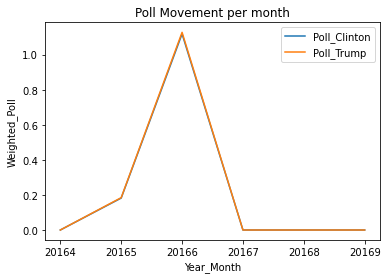

In [46]:
# line 1 points
x1 = df_elec_ym2['year_month']
y1 = df_elec_ym2['w_poll_t']
# plotting the line 1 points 
plt.plot(x1, y1, label = "Poll_Clinton")
# line 2 points
x2 = df_elec_ym2['year_month']
y2 = df_elec_ym2['w_poll_c']
# plotting the line 2 points 
plt.plot(x2, y2, label = "Poll_Trump")

plt.xlabel('Year_Month')
# Set the y axis label of the current axis.
plt.ylabel('Weighted_Poll')
# Set a title of the current axes.
plt.title('Poll Movement per month')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

**NO RELATION**

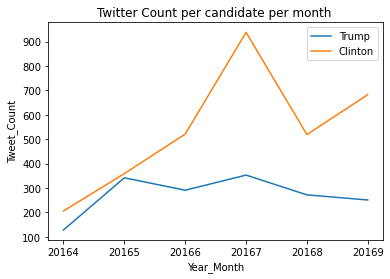

In [47]:
# line 1 points
x1 = df_elect_ym1['year_month']
y1 = df_elect_ym1['tw_count_tr']
# plotting the line 1 points 
plt.plot(x1, y1, label = "Trump")
# line 2 points
x2 = df_elect_ym1['year_month']
y2 = df_elect_ym1['tw_count_cl']
# plotting the line 2 points 
plt.plot(x2, y2, label = "Clinton")
plt.xlabel('Year_Month')
# Set the y axis label of the current axis.
plt.ylabel('Tweet_Count')
# Set a title of the current axes.
plt.title('Twitter Count per candidate per month ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

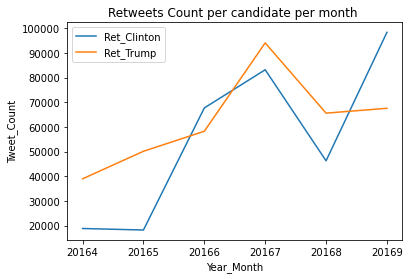

In [48]:
# line 3 points
x3 = df_elec_ym2['year_month']
y3 = df_elec_ym2['retweets_clinton']
# plotting the line 1 points 
plt.plot(x3, y3, label = "Ret_Clinton")
# line 4 points
x3 = df_elec_ym2['year_month']
y3 = df_elec_ym2['retweets_trump']
# plotting the line 1 points 
plt.plot(x3, y3, label = "Ret_Trump")
plt.xlabel('Year_Month')
# Set the y axis label of the current axis.
plt.ylabel('Tweet_Count')
# Set a title of the current axes.
plt.title('Retweets Count per candidate per month ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

**Interesting, despite Trump having significantly lower tweets in July, his influence in Retweets was bigger!
let´s see if that affects the market too, seems Trump´s tweet´s are better**

In [49]:
df_elec_ym2.head(5)

,year_month,year,month,day,open,high,low,close,adj close,volume,tw_count_cl,retweets_clinton,favorites_clinton,retweets_trump,favorites_trump,tw_count_tr,w_poll_c,w_poll_t
0,20164,2016.0,4.0,23.5,2090.427000,2096.714000,2080.090000,2089.635000,2089.635000,3.935606e+09,14.714286,18831.357143,40332.357143,38969.571429,114121.285714,9.142857,1.026708e-07,1.026287e-07
1,20165,2016.0,5.0,16.0,2064.094762,2073.309524,2055.414286,2065.550476,2065.550476,3.756362e+09,11.580645,18218.903226,36854.774194,50129.322581,145984.870968,11.032258,1.845978e-01,1.822610e-01
2,20166,2016.0,6.0,15.5,2083.469545,2093.831818,2072.063636,2083.891364,2083.891364,3.947850e+09,17.366667,67693.266667,143860.466667,58244.533333,161772.366667,9.700000,1.127795e+00,1.118985e+00
3,20167,2016.0,7.0,16.0,2145.646500,2153.438500,2139.559500,2148.902000,2148.902000,3.476512e+09,30.258065,83164.387097,209740.225806,94040.903226,283856.645161,11.387097,3.916431e-07,3.808859e-07
4,20168,2016.0,8.0,16.0,2177.612609,2182.671739,2171.063478,2177.482174,2177.482174,3.287405e+09,16.741935,46278.258065,112012.741935,65581.000000,187559.580645,8.774194,5.613585e-06,5.430300e-06


In [50]:
#I will take the average retweets per month, and check it with the average adj close price of the stock, 
#to see if there is a correlation

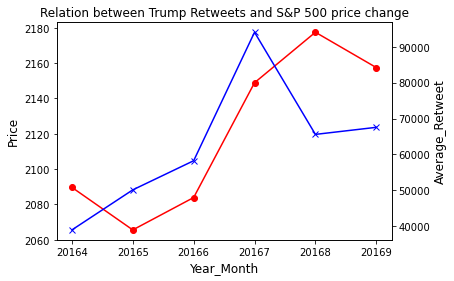

In [51]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_elec_ym2['year_month'], df_elec_ym2['adj close'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year_Month",fontsize=12)
# set y-axis label
ax.set_ylabel("Price",fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_elec_ym2['year_month'], df_elec_ym2['retweets_trump'],color="blue",marker="x")
ax2.set_ylabel("Average_Retweet",fontsize=12)
ax.set_title('Relation between Trump Retweets and S&P 500 price change')
plt.show()



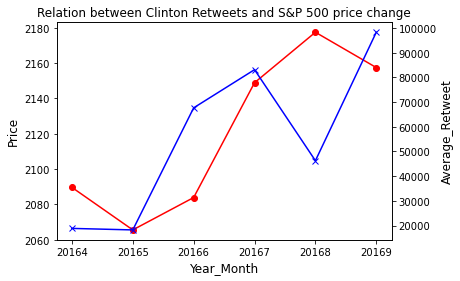

In [52]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_elec_ym2['year_month'], df_elec_ym2['adj close'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year_Month",fontsize=12)
# set y-axis label
ax.set_ylabel("Price",fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_elec_ym2['year_month'], df_elec_ym2['retweets_clinton'],color="blue",marker="x")
ax2.set_ylabel("Average_Retweet",fontsize=12)
ax.set_title('Relation between Clinton Retweets and S&P 500 price change')
plt.show()



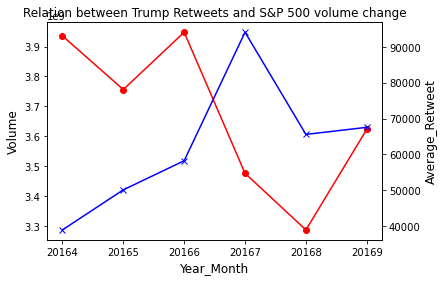

In [57]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_elec_ym2['year_month'], df_elec_ym2['volume'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year_Month",fontsize=12)
# set y-axis label
ax.set_ylabel("Volume",fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_elec_ym2['year_month'], df_elec_ym2['retweets_trump'],color="blue",marker="x")
ax2.set_ylabel("Average_Retweet",fontsize=12)
ax.set_title('Relation between Trump Retweets and S&P 500 volume change')
plt.show()



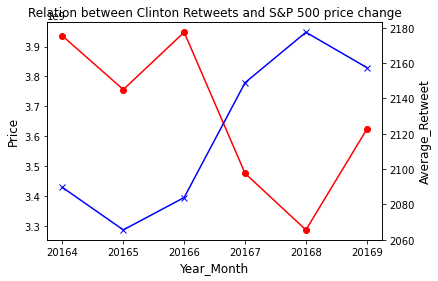

In [55]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_elec_ym2['year_month'], df_elec_ym2['volume'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year_Month",fontsize=12)
# set y-axis label
ax.set_ylabel("Price",fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_elec_ym2['year_month'], df_elec_ym2['close'],color="blue",marker="x")
ax2.set_ylabel("Average_Retweet",fontsize=12)
ax.set_title('Relation between Clinton Retweets and S&P 500 price change')
plt.show()

